<a href="https://www.kaggle.com/code/vedatgul/airline-passenger-forecasting?scriptVersionId=265048397" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ✈️ Airline Passenger Forecasting with ARIMA

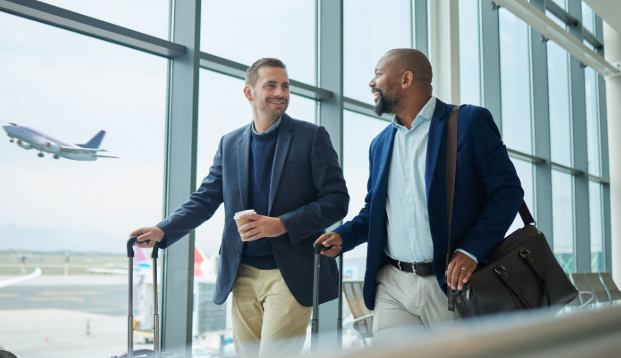

## 📌 Introduction
This notebook focuses on **time series forecasting** using the classic **Airline Passenger dataset (1949–1960)**.  
The goal is to build an ARIMA model to capture **trend, seasonality, and noise** in the data and forecast future passenger counts.  

## 🎯 Key Insights
- Time series needs to be **stationary** before ARIMA modeling.  
- **AIC optimization** helps in selecting the best model parameters.  
- ARIMA provides solid results for datasets with **trend and seasonality**. 

In [1]:
import itertools
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings('ignore')

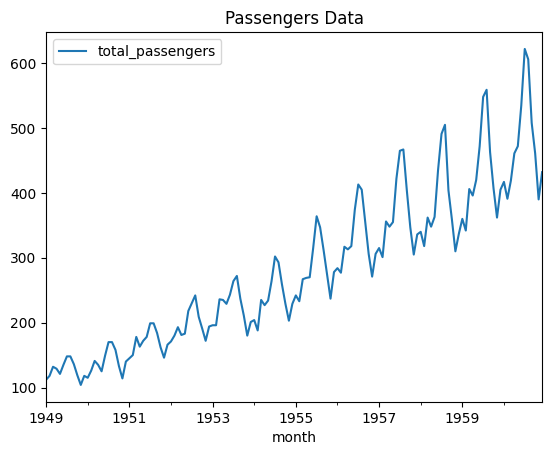

In [2]:
#################################
# Visualization
#################################

df = pd.read_csv('/kaggle/input/airline-passengers/airline-passengers.csv', index_col='month', parse_dates=True)

df.shape
df.head()

df[['total_passengers']].plot(title='Passengers Data')
plt.show()

df.index

df.index.freq = "MS"

train = df[:120]
test = df[120:]

alpha: 0.01 mae: 225.5863
alpha: 0.11 mae: 82.528
alpha: 0.21 mae: 82.8979
alpha: 0.31 mae: 89.8377
alpha: 0.41 mae: 99.0585
alpha: 0.51 mae: 107.5558
alpha: 0.61 mae: 113.7514
alpha: 0.71 mae: 117.2224
alpha: 0.81 mae: 118.1776
alpha: 0.91 mae: 117.2438
best_alpha: 0.11 best_mae: 82.528


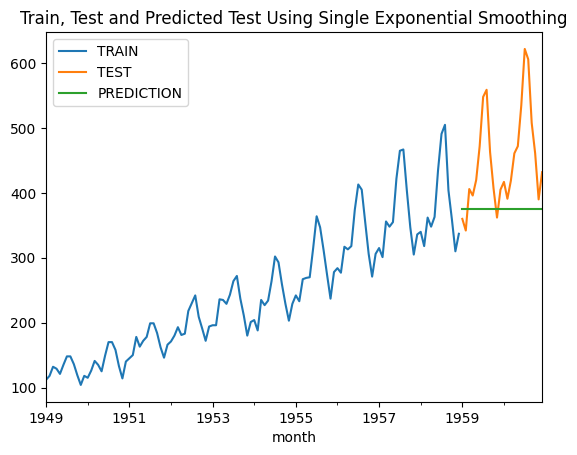

In [3]:
#################################
# Single Exponential Smoothing
#################################

def ses_optimizer(train, alphas, step=48):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.01, 1, 0.10)
best_alpha, best_mae = ses_optimizer(train, alphas, step=24)
# best_alpha: 0.11 best_mae: 82.528

ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(24)

def plot_prediction(y_pred, label):
    train["total_passengers"].plot(legend=True, label="TRAIN")
    test["total_passengers"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train, Test and Predicted Test Using "+label)
    plt.show()

plot_prediction(y_pred, "Single Exponential Smoothing")

alpha: 0.01 beta: 0.01 mae: 54.9512
alpha: 0.01 beta: 0.11 mae: 54.1036
alpha: 0.01 beta: 0.21 mae: 55.5569
alpha: 0.01 beta: 0.31 mae: 57.3247
alpha: 0.01 beta: 0.41 mae: 57.7931
alpha: 0.01 beta: 0.51 mae: 57.9968
alpha: 0.01 beta: 0.61 mae: 57.9637
alpha: 0.01 beta: 0.71 mae: 57.5635
alpha: 0.01 beta: 0.81 mae: 57.3334
alpha: 0.01 beta: 0.91 mae: 57.8984
alpha: 0.11 beta: 0.01 mae: 55.0309
alpha: 0.11 beta: 0.11 mae: 58.4728
alpha: 0.11 beta: 0.21 mae: 69.6339
alpha: 0.11 beta: 0.31 mae: 72.555
alpha: 0.11 beta: 0.41 mae: 78.8168
alpha: 0.11 beta: 0.51 mae: 81.996
alpha: 0.11 beta: 0.61 mae: 77.2262
alpha: 0.11 beta: 0.71 mae: 71.5042
alpha: 0.11 beta: 0.81 mae: 69.0258
alpha: 0.11 beta: 0.91 mae: 67.8408
alpha: 0.21 beta: 0.01 mae: 57.1824
alpha: 0.21 beta: 0.11 mae: 74.992
alpha: 0.21 beta: 0.21 mae: 95.9492
alpha: 0.21 beta: 0.31 mae: 115.3164
alpha: 0.21 beta: 0.41 mae: 139.4303
alpha: 0.21 beta: 0.51 mae: 178.3759
alpha: 0.21 beta: 0.61 mae: 243.4543
alpha: 0.21 beta: 0.71 mae:

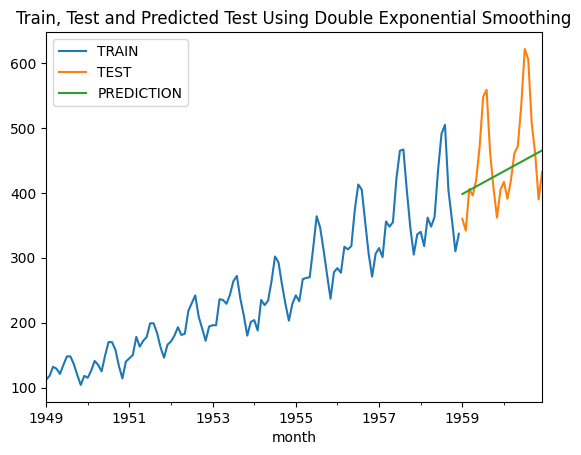

In [4]:
#################################
# Double Exponential Smoothing
#################################

def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae

alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas, step=24)
# best_alpha: 0.01 best_beta: 0.11 best_mae: 54.1036

des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                         smoothing_slope=best_beta)
y_pred = des_model.forecast(24)

plot_prediction(y_pred, "Double Exponential Smoothing")



[0.1, 0.1, 0.1, 36.83]
[0.1, 0.1, 0.3, 34.88]
[0.1, 0.1, 0.5, 35.91]
[0.1, 0.1, 0.7, 38.72]
[0.1, 0.1, 0.9, 42.55]
[0.1, 0.3, 0.1, 53.96]
[0.1, 0.3, 0.3, 53.0]
[0.1, 0.3, 0.5, 56.98]
[0.1, 0.3, 0.7, 61.38]
[0.1, 0.3, 0.9, 67.17]
[0.1, 0.5, 0.1, 56.77]
[0.1, 0.5, 0.3, 51.72]
[0.1, 0.5, 0.5, 53.39]
[0.1, 0.5, 0.7, 60.08]
[0.1, 0.5, 0.9, 79.29]
[0.1, 0.7, 0.1, 34.04]
[0.1, 0.7, 0.3, 25.93]
[0.1, 0.7, 0.5, 27.81]
[0.1, 0.7, 0.7, 27.91]
[0.1, 0.7, 0.9, 38.32]
[0.1, 0.9, 0.1, 26.87]
[0.1, 0.9, 0.3, 25.32]
[0.1, 0.9, 0.5, 53.88]
[0.1, 0.9, 0.7, 38.38]
[0.1, 0.9, 0.9, 17.78]
[0.3, 0.1, 0.1, 54.54]
[0.3, 0.1, 0.3, 38.34]
[0.3, 0.1, 0.5, 31.57]
[0.3, 0.1, 0.7, 30.99]
[0.3, 0.1, 0.9, 29.23]
[0.3, 0.3, 0.1, 72.71]
[0.3, 0.3, 0.3, 22.6]
[0.3, 0.3, 0.5, 11.99]
[0.3, 0.3, 0.7, 17.11]
[0.3, 0.3, 0.9, 22.32]
[0.3, 0.5, 0.1, 132.33]
[0.3, 0.5, 0.3, 25.74]
[0.3, 0.5, 0.5, 17.3]
[0.3, 0.5, 0.7, 38.38]
[0.3, 0.5, 0.9, 56.82]
[0.3, 0.7, 0.1, 288.32]
[0.3, 0.7, 0.3, 134.86]
[0.3, 0.7, 0.5, 96.77]
[0.3, 0.7, 

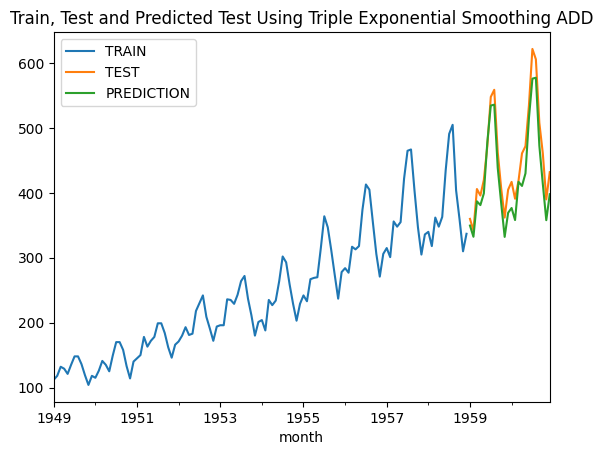

In [5]:
#################################
# Triple Exponential Smoothing (Holt-Winters)
#################################


def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step=24)

# best_alpha: 0.3 best_beta: 0.3 best_gamma: 0.5 best_mae: 11.9947

tes_model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

y_pred = tes_model.forecast(24)

plot_prediction(y_pred, "Triple Exponential Smoothing ADD")

ARIMA(0, 0, 0) AIC=1436.33
ARIMA(0, 0, 1) AIC=1295.42
ARIMA(0, 0, 2) AIC=1229.22
ARIMA(0, 0, 3) AIC=1169.61
ARIMA(0, 1, 0) AIC=1138.81
ARIMA(0, 1, 1) AIC=1127.02
ARIMA(0, 1, 2) AIC=1126.97
ARIMA(0, 1, 3) AIC=1125.45
ARIMA(0, 2, 0) AIC=1171.65
ARIMA(0, 2, 1) AIC=1136.52
ARIMA(0, 2, 2) AIC=1124.36
ARIMA(0, 2, 3) AIC=1124.57
ARIMA(0, 3, 0) AIC=1263.95
ARIMA(0, 3, 1) AIC=1169.49
ARIMA(0, 3, 2) AIC=1140.39
ARIMA(0, 3, 3) AIC=1127.31
ARIMA(1, 0, 0) AIC=1152.40
ARIMA(1, 0, 1) AIC=1138.85
ARIMA(1, 0, 2) AIC=1140.24
ARIMA(1, 0, 3) AIC=1142.18
ARIMA(1, 1, 0) AIC=1130.66
ARIMA(1, 1, 1) AIC=1125.43
ARIMA(1, 1, 2) AIC=1118.10
ARIMA(1, 1, 3) AIC=1119.79
ARIMA(1, 2, 0) AIC=1168.21
ARIMA(1, 2, 1) AIC=1127.97
ARIMA(1, 2, 2) AIC=1122.89
ARIMA(1, 2, 3) AIC=1123.66
ARIMA(1, 3, 0) AIC=1232.81
ARIMA(1, 3, 1) AIC=1166.48
ARIMA(1, 3, 2) AIC=1170.58
ARIMA(1, 3, 3) AIC=1130.67
ARIMA(2, 0, 0) AIC=1141.99
ARIMA(2, 0, 1) AIC=1138.37
ARIMA(2, 0, 2) AIC=1138.68
ARIMA(2, 0, 3) AIC=1135.89
ARIMA(2, 1, 0) AIC=1126.84
A

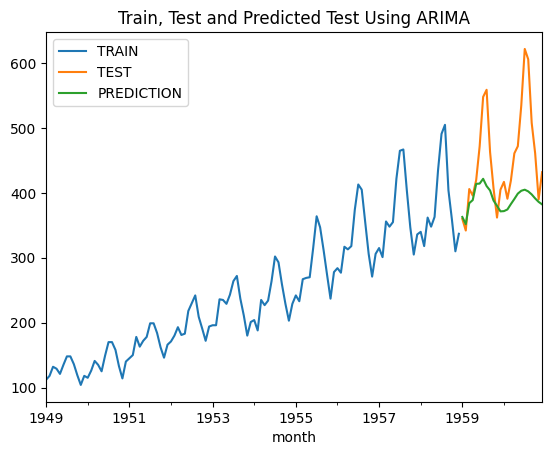

In [6]:
##################################################
# ARIMA(p, d, q): (Autoregressive Integrated Moving Average)
##################################################
import itertools
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))


def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            # Yeni sürümde disp yok!
            arma_model_result = ARIMA(train, order=order).fit()
            aic = arma_model_result.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except Exception as e:
            # print(f"Skipped {order} due to {e}")  # hata görmek istersen
            continue
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params


best_params_aic = arima_optimizer_aic(train, pdq)


arima_model = ARIMA(train, order=best_params_aic).fit()


y_pred = arima_model.forecast(steps=len(test))


print("MAE:", mean_absolute_error(test, y_pred))


plot_prediction(pd.Series(y_pred, index=test.index), "ARIMA")

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1680.279235189968
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1557.632164263754
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1060.4792883429309
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1014.0696747520221
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1231.986585347049
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1185.3010979095175
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:969.3781382610703
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:951.6116627407446
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1524.362085340244
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1403.5942350545395
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:967.5225695584725
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:942.2425093047344
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1136.4998829514873
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1127.839701553321
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:918.2233876024309
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:896.7241845281821
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1138.8088994229292
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1049

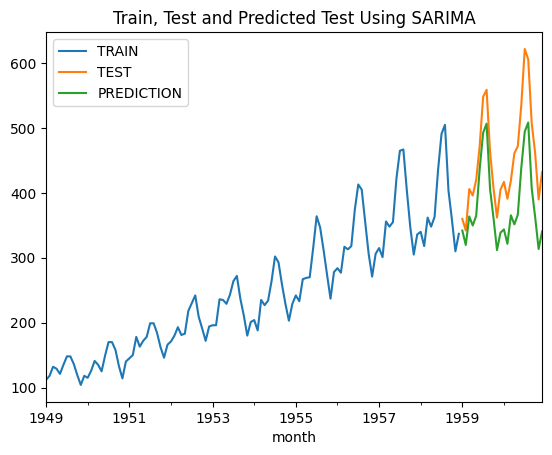

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:452.25
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:367.2095471179027
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:71.25
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:72.62972636898385
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:74.93593355237346
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:76.79703429835227
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:58.59973878913499
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:30.623032600654074
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:442.67323632601864
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:356.28978572352213
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:70.49252849813801
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:71.3205167451594
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:75.48450804146553
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:76.43120320046133
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:61.01388539385371
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:31.733490552071647
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:115.25
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:119.36368392961532
SARIMA(0, 1, 0)x(0, 1,

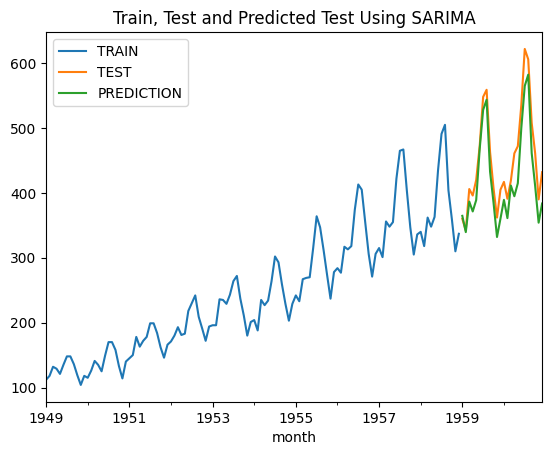

In [7]:
##################################################
# SARIMA
##################################################

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), float("inf"), None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=24)

y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)
# 68.57726545235921

plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")


# MAE


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), float("inf"), None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=24)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)

                # mae = fit_model_sarima(train, val, param, param_seasonal)

                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=24)
y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)
# 30.623362595882828

plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")

In [8]:
# Final model

tes_model_final = ExponentialSmoothing(df, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

tes_model_final.forecast(6)

1961-01-01    450.286321
1961-02-01    429.302001
1961-03-01    475.721689
1961-04-01    502.017532
1961-05-01    516.825533
1961-06-01    579.037141
Freq: MS, dtype: float64